# Gettin data from NOAA webpage

In [2]:
!wget -O land_global_temperature_anomaly-1880-2015.csv https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv

--2017-01-04 13:27:30--  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv
Resolviendo www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.172, 205.167.25.171, 2610:20:8040:2::171, ...
Conectando con www.ncdc.noaa.gov (www.ncdc.noaa.gov)[205.167.25.172]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [text/plain]
Grabando a: “land_global_temperature_anomaly-1880-2015.csv”

    [  <=>                                  ] 23.796      63,5KB/s   en 0,4s   

2017-01-04 13:27:31 (63,5 KB/s) - “land_global_temperature_anomaly-1880-2015.csv” guardado [23796]



In [1]:
import numpy

In [2]:
!head land_global_temperature_anomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [3]:
numpy.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv',delimiter=',',skiprows=4)

array([[  1.88001000e+05,  -1.53800000e-01],
       [  1.88002000e+05,  -5.77100000e-01],
       [  1.88003000e+05,  -7.25000000e-01],
       ..., 
       [  2.01510000e+05,   1.32120000e+00],
       [  2.01511000e+05,   1.28280000e+00],
       [  2.01512000e+05,   1.87220000e+00]])

In [4]:
T_land = numpy.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv',delimiter=',',skiprows=4)

In [5]:
print(T_land)

[[  1.88001000e+05  -1.53800000e-01]
 [  1.88002000e+05  -5.77100000e-01]
 [  1.88003000e+05  -7.25000000e-01]
 ..., 
 [  2.01510000e+05   1.32120000e+00]
 [  2.01511000e+05   1.28280000e+00]
 [  2.01512000e+05   1.87220000e+00]]


In [6]:
numpy.shape(T_land)

(1632, 2)

In [7]:
T_land.shape

(1632, 2)

In [8]:
1632/2

816.0

In [9]:
1632/12

136.0

In [10]:
2015-1880

135

In [11]:
from matplotlib import pyplot
%matplotlib inline

/home/admin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/admin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [12]:
T_land[0]

array([  1.88001000e+05,  -1.53800000e-01])

In [13]:
T_land[:,1]

array([-0.1538, -0.5771, -0.725 , ...,  1.3212,  1.2828,  1.8722])

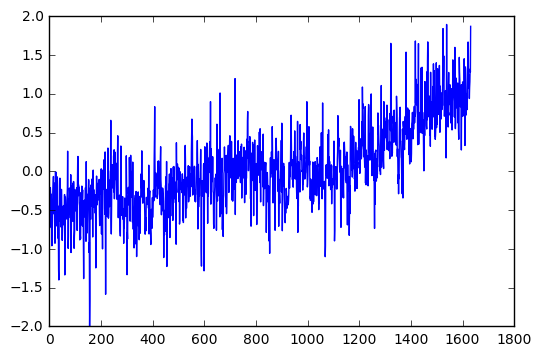

In [14]:
pyplot.plot(T_land[:,1])

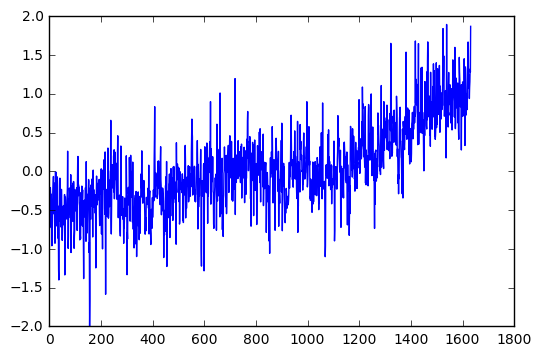

In [15]:
#Remember ti remove the ugly line at the beggining of the plot
#We us a ; at the end of the command
pyplot.plot(T_land[:,1]);

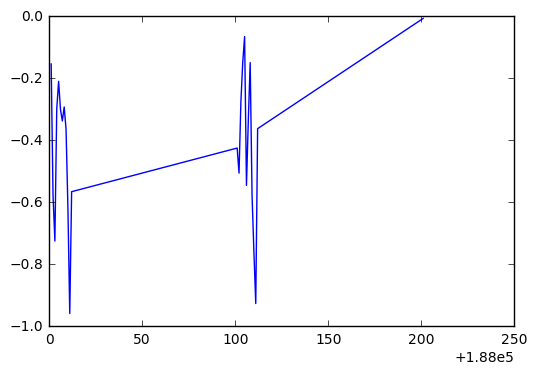

In [17]:
pyplot.plot(T_land[0:25,0], T_land[0:25,1]);

# Using `numpy.arange()` for creating our date-array

In [18]:
date = numpy.arange('1880','2016',dtype=('datetime64[M]'))

In [19]:
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [20]:
len(date)

1632

In [21]:
dummy = numpy.linspace(1,1632, 1632)

In [22]:
print(dummy)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.63000000e+03
   1.63100000e+03   1.63200000e+03]


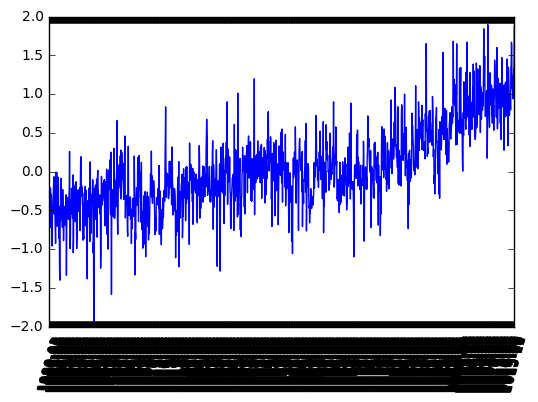

In [24]:
pyplot.xticks(dummy, date, rotation=75)
#pyplot.xticks(dummy[::12*10],date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:, 1]);

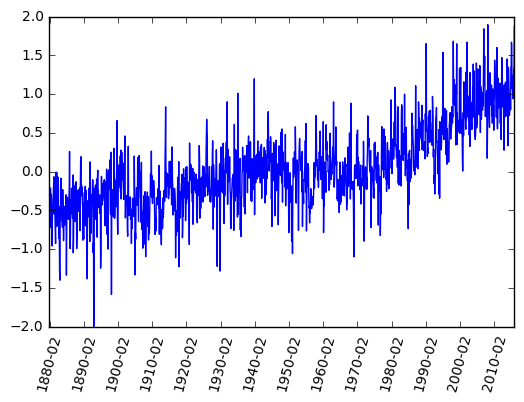

In [26]:
pyplot.xticks(dummy[1::12*10],date[1::12*10], rotation=75) 
#it cuts january and start from february
pyplot.plot(dummy, T_land[:, 1]);
#start:stop:step; ::step

KeyError: 'fonr.family is not a valid rc parameter.See rcParams.keys() for a list of valid parameters.'

In [29]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

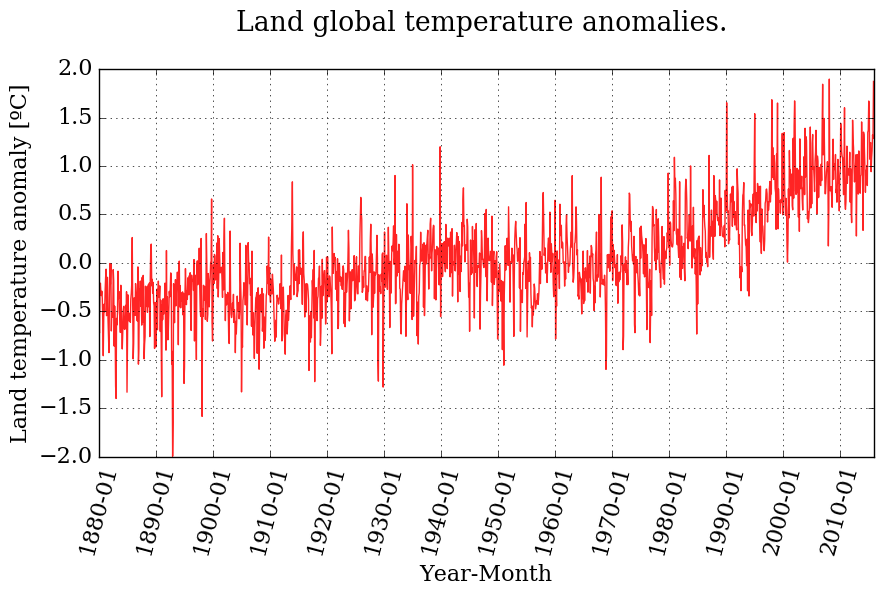

In [32]:
pyplot.figure(figsize=(10,5))
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:, 1], color='#ff2424', ls='-', lw=1);#linestyle='-' and linewidth=1
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [ºC]')
pyplot.grid()
pyplot.savefig('temp_anomalies.pdf');

# Histrogram 

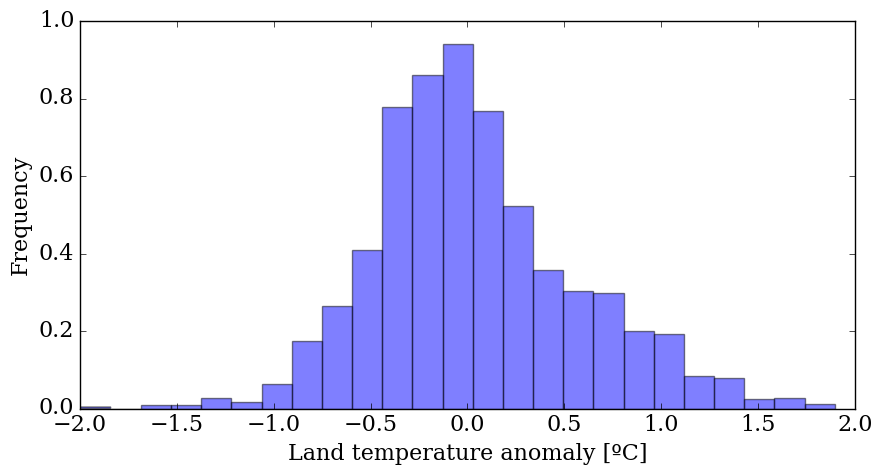

In [36]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins=25, normed=True, color='b', alpha=0.5)
pyplot.xlabel('Land temperature anomaly [ºC]')
pyplot.ylabel('Frequency');

# Let's do some stats

In [38]:
mean_T = numpy.mean(T_land[:,1])
median_T = numpy.median(T_land[:,1])

print('The mean value is {:.5} and the median is {:.5}'.format(mean_T, median_T))

The mean value is 0.04031 and the median is -0.0276


In [39]:
variance_T = numpy.var(T_land[:,1])
sigma_T = numpy.sqrt(variance_T)

print('The variance is {:.5} and the standard deviation is {:.5}'.format(variance_T, sigma_T))

The variance is 0.28041 and the standard deviation is 0.52954


In [41]:
from scipy import stats

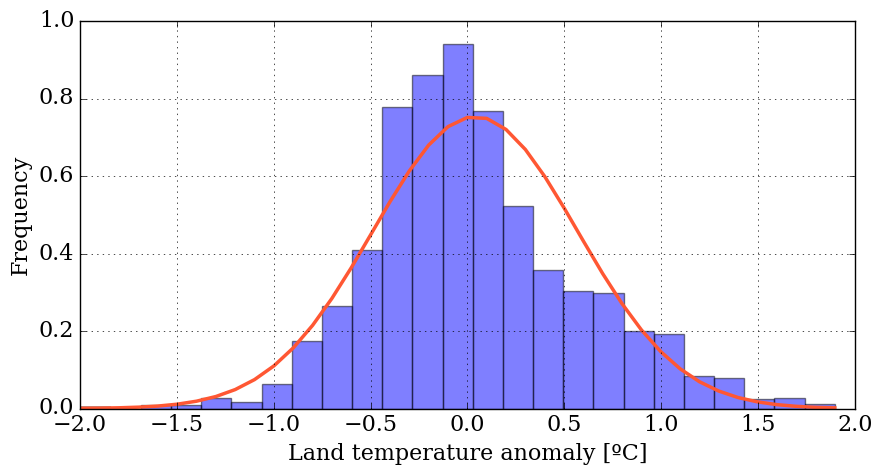

In [44]:
bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)

pyplot.figure(figsize=(10,5))

pyplot.hist(T_land[:,1], bins=25, normed=True, color='b', alpha=0.5)

#Plot the probability density function
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T), color='#ff5733', ls='-', lw=2.5)

pyplot.xlabel('Land temperature anomaly [ºC]')
pyplot.ylabel('Frequency');
pyplot.grid();

# Two plots in the same figure 

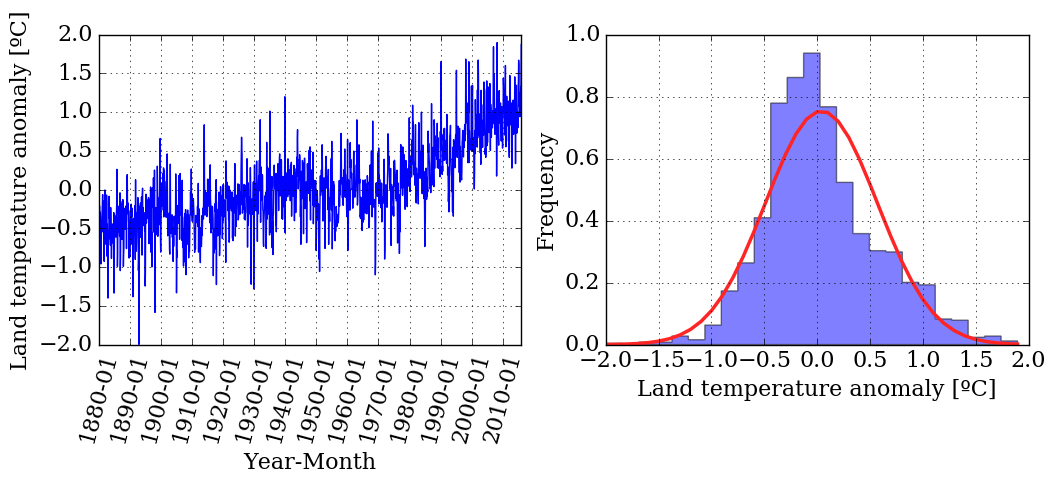

In [50]:
pyplot.figure(figsize=(12,4))

#first plot
pyplot.subplot(121) #creates a grid of 1 row, 2 columns and select the first plot.

pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:, 1], color='b', ls='-', lw=1);#linestyle='-' and linewidth=1
#pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [ºC]')
pyplot.grid()

#second plot
pyplot.subplot(122)

bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)

#plot the histogram
pyplot.hist(T_land[:,1], bins=25, normed=True, color='b', alpha=0.5, histtype='stepfilled')

#Plot the probability density function
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T), color='#ff2525', ls='-', lw=2.5)

pyplot.xlabel('Land temperature anomaly [ºC]')
pyplot.ylabel('Frequency');
pyplot.grid();


# Smooth the data

In [51]:
def smooth_data(N, data):
    """
    Returns smoothed data using a sliding_moving acarage.
    
    Arguments:
    ----------
    N(int)       : amount of data values we want to average.
    data (array) : array of data we want to smooth.
    
    Returns:
    --------
    smooth (array): array with smoothed data.
    """
    
    window = numpy.ones(N)/N
    smooth = numpy.convolve(data, window, 'same')
    
    return smooth

In [52]:
?smooth_data

In [53]:
smooth = smooth_data(12, T_land[:,1])

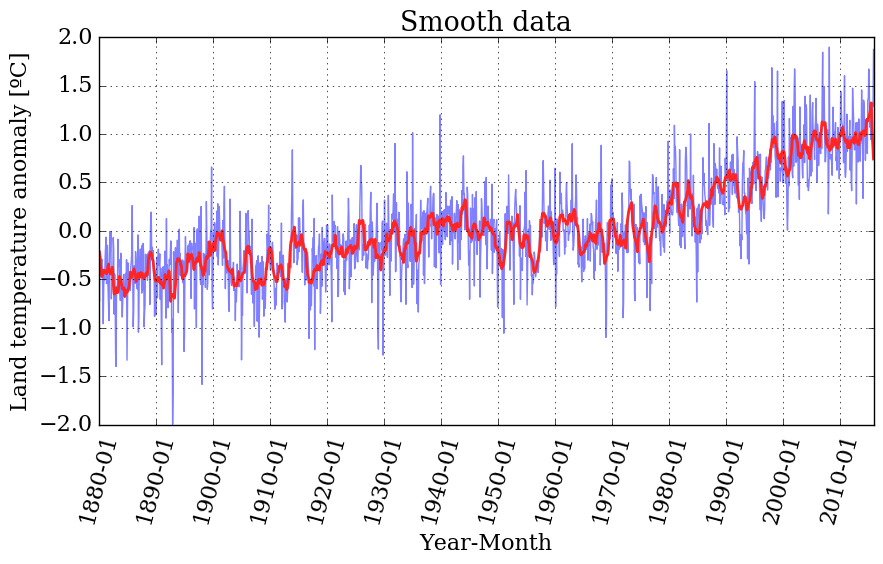

In [64]:
pyplot.figure(figsize=(10,5))

pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:, 1], color='b', ls='-', lw=1, alpha=0.5)
pyplot.plot(dummy, smooth, color='#ff2525', ls='-', lw=2)

pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [ºC]')
pyplot.title('Smooth data')
pyplot.grid()


#Linear regression (THE easy way)

# Linear regression (THE easy way)


In [67]:
m, b = numpy.polyfit(dummy, T_land[:,1],1)

In [68]:
print(m, b)

0.000832212749511 -0.639191783505


In [82]:
f_linear = numpy.poly1d((m, b))

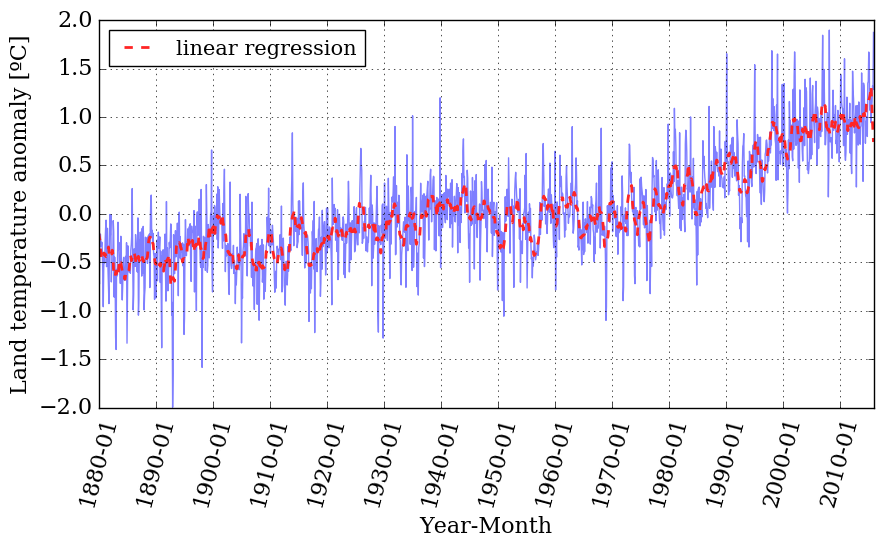

In [83]:
pyplot.figure(figsize=(10,5))

pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:, 1], color='b', ls='-', lw=1, alpha=0.5)

pyplot.plot(dummy, f_linear(dummy), color='k', ls='--', lw=2, label='linear regression')

pyoplot
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [ºC]')
pyplot.legend(loc = 'best', fontsize=15)
pyplot.grid();